#  Social Sensing 2

We have just experienced the power of social networks using python. You have seen how powerful the libraries are and have worked through a complete Twitter analysis. But we have also seen how difficult it is to get the graph visualisations right. The plotted networks can definitely improve. Other plots are fairly boring – like my uninspiring Twitter follower network. In order to dig deeper into the details of social network analysis, let’s use a famous example from the past.

Zachary’s karate club is a social network of friendships of 34 members of a karate club at a US university in the 1970s. It is described in W. W. Zachary, An information flow model for conflict and fission in small groups, Journal of Anthropological Research 33, 452-473 (1977). It is a famous early example of successful social network analysis. According to Wikipedia, ‘during the study a conflict arose between the administrator and instructor, which led to the split of the club into two. Half of the members formed a new club around the instructor members from the other part found a new instructor or gave up karate. Based on collected data Zachary assigned correctly all but one member of the club to the groups they actually joined after the split.’ https://en.wikipedia.org/wiki/Zachary%27s_karate_club.

--> igraph python https://igraph.org/python/

First download igraph.

You have two data frames loaded in the environment. karate_nodes contains the nodes of the network with information about the karate club members. Check it with head(karate_nodes).

In [1]:
import igraph
import pandas as pd
import numpy as np
import csv
import matplotlib as plt

In [2]:
karate_nodes = pd.read_csv("data/karate_nodes.csv")
karate_nodes.head()

,id,first_name,last_name,gender,age
0,1,Trang,Philips,F,18
1,2,Lovie,Stanek,F,36
2,3,Gary,James,M,43
3,4,Maximo,Larimer,M,41
4,5,Bruno,Drury,M,18


The second data frame karate_edges contains the edges with information whether one member likes another and by how much.

In [3]:
karate_edges = pd.read_csv("data/karate_edges.csv")
karate_edges[:20]

,from,to,weight,type
0,1,2,9,likes
1,1,3,5,likes
2,1,4,2,likes
3,1,5,3,likes
4,1,6,12,likes
5,1,7,10,likes
6,1,8,10,likes
7,1,9,16,likes
8,1,11,12,likes
9,1,12,10,likes


Now, let’s create an igraph karate_g with these edges and nodes.

We first need to download iGraph and then type from igraph import*

A tutorial can be found at: https://igraph.org/python/doc/tutorial/tutorial.html#layouts-and-plotting

In [4]:
from igraph import *
g = Graph()

In [5]:
# Igraph needs tuples, cannot work with a dataframe directly

tuple_edges = [tuple(x) for x in karate_edges.values]

Gm = igraph.Graph.TupleList(tuple_edges, directed = True, edge_attrs = ['weight'])

In [6]:
tuple_nodes = [tuple(x) for x in karate_nodes.values]
Gm.add_vertices(tuple_nodes)

In [7]:
print(Gm)

IGRAPH DNW- 68 78 --
+ attr: name (v), weight (e)
+ edges (vertex names):
1->2, 1->3, 1->4, 1->5, 1->6, 1->7, 1->8, 1->9, 1->11, 1->12, 1->13, 1->14,
1->18, 1->20, 1->22, 1->32, 2->3, 2->4, 2->8, 2->14, 2->18, 2->20, 2->22,
2->31, 3->4, 3->8, 3->9, 3->10, 3->14, 3->28, 3->29, 3->33, 4->8, 4->13,
4->14, 5->7, 5->11, 6->7, 6->11, 6->17, 7->17, 9->31, 9->33, 9->34, 10->34,
14->34, 15->33, 15->34, 16->33, 16->34, 19->33, 19->34, 20->34, 21->33,
21->34, 23->33, 23->34, 24->26, 24->28, 24->30, 24->33, 24->34, 25->26,
25->28, 25->32, 26->32, 27->30, 27->34, 28->34, 29->32, 29->34, 30->33,
30->34, 31->33, 31->34, 32->33, 32->34, 33->34


In [8]:
graph = Graph.DictList(
          vertices=karate_nodes.to_dict('records'),
          edges=karate_edges.to_dict('records'),
          directed=True,
          vertex_name_attr='id',
          edge_foreign_keys=('from', 'to'));

In [9]:
print(graph)

IGRAPH D-W- 34 78 --
+ attr: age (v), first_name (v), gender (v), id (v), last_name (v), from (e),
  to (e), type (e), weight (e)
+ edges:
0->1 0->2 0->3 0->4 0->5 0->6 0->7 0->8 0->10 0->11 0->12 0->13 0->17 0->19
0->21 0->31 1->2 1->3 1->7 1->13 1->17 1->19 1->21 1->30 2->3 2->7 2->8 2->9
2->13 2->27 2->28 2->32 3->7 3->12 3->13 4->6 4->10 5->6 5->10 5->16 6->16
8->30 8->32 8->33 9->33 13->33 14->32 14->33 15->32 15->33 18->32 18->33
19->33 20->32 20->33 22->32 22->33 23->25 23->27 23->29 23->32 23->33 24->25
24->27 24->31 25->31 26->29 26->33 27->33 28->31 28->33 29->32 29->33 30->32
30->33 31->32 31->33 32->33


We can look into the nodes of the graph using graph.vs

In [10]:
vseq = graph.vs
for v in vseq:
    print(v)

igraph.Vertex(<igraph.Graph object at 0x110aeea90>, 0, {'id': 1, 'first_name': 'Trang', 'last_name': 'Philips', 'gender': 'F', 'age': 18})
igraph.Vertex(<igraph.Graph object at 0x110aeea90>, 1, {'id': 2, 'first_name': 'Lovie', 'last_name': 'Stanek', 'gender': 'F', 'age': 36})
igraph.Vertex(<igraph.Graph object at 0x110aeea90>, 2, {'id': 3, 'first_name': 'Gary', 'last_name': 'James', 'gender': 'M', 'age': 43})
igraph.Vertex(<igraph.Graph object at 0x110aeea90>, 3, {'id': 4, 'first_name': 'Maximo', 'last_name': 'Larimer', 'gender': 'M', 'age': 41})
igraph.Vertex(<igraph.Graph object at 0x110aeea90>, 4, {'id': 5, 'first_name': 'Bruno', 'last_name': 'Drury', 'gender': 'M', 'age': 18})
igraph.Vertex(<igraph.Graph object at 0x110aeea90>, 5, {'id': 6, 'first_name': 'Lillian', 'last_name': 'Sowinski', 'gender': 'F', 'age': 22})
igraph.Vertex(<igraph.Graph object at 0x110aeea90>, 6, {'id': 7, 'first_name': 'Candice', 'last_name': 'Gonsalez', 'gender': 'F', 'age': 17})
igraph.Vertex(<igraph.Grap

We can see the node together with its attributes, if we want to now only see the age attribute of each node, we access it using ['age']

In [11]:
for v in vseq:
    print(v['age'])

18
36
43
41
18
22
17
40
20
44
18
20
21
25
26
42
28
40
41
18
36
36
43
36
31
45
26
21
25
26
23
45
43
23


Let's try an plot this graph

(We need to install cairo to do so)

pip3 install cairocffi

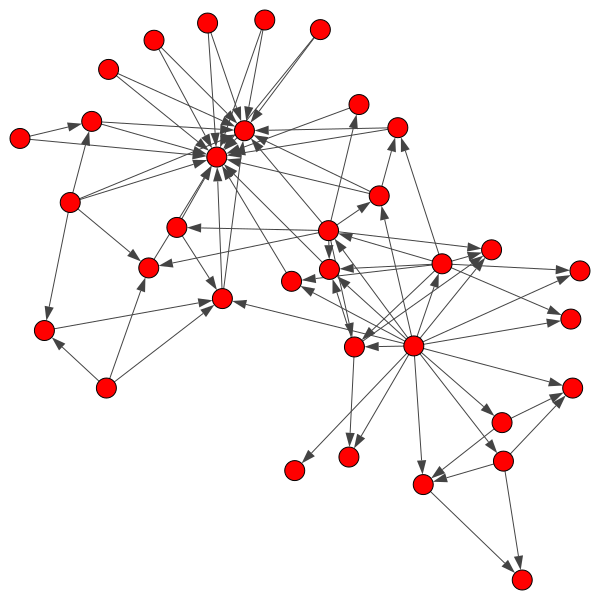

In [12]:
import cairocffi
layout = graph.layout("kamada_kawai")
plot(graph, layout = layout)

You can also plot a graph with curved edges (edge_curved=True) and reduced arrow size. (edge_arrow_size=.4)

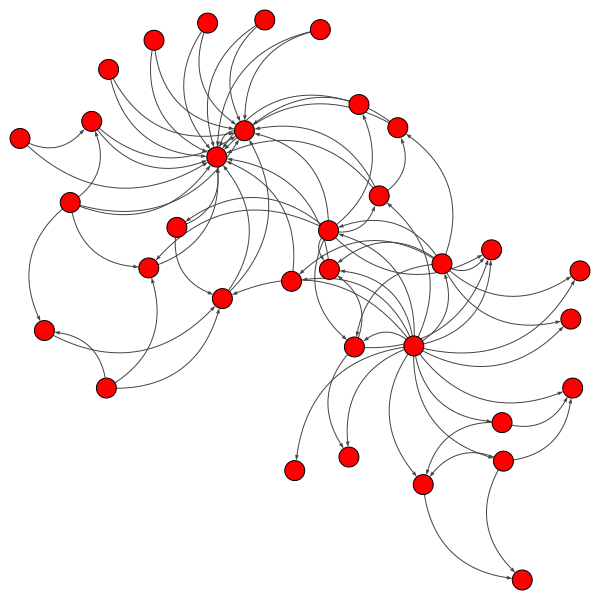

In [13]:
layout = graph.layout("kamada_kawai")
plot(graph, layout = layout, edge_curved=True, edge_arrow_size=.4)

Maybe that is a bit much let's change the curve to 0.1. Let’s try a more complicated plot, we could also add some other parameters. Now we can access the ids by using graph.vs['id'] and add them as vertex_label parameter.

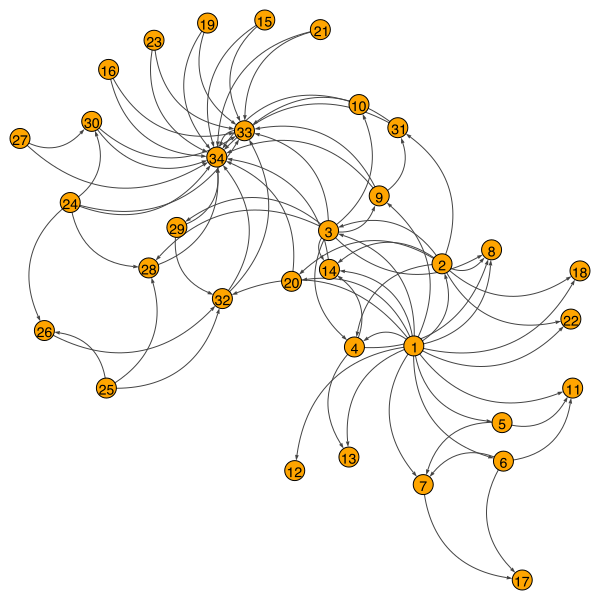

In [14]:
layout = graph.layout("kamada_kawai")
plot(graph, layout = layout, edge_curved=True, edge_arrow_size=.4, vertex_label=graph.vs['id'], vertex_color='orange')

We could do the same, but then with the actual names, remember how we accessed the ids? Do the same with the names.

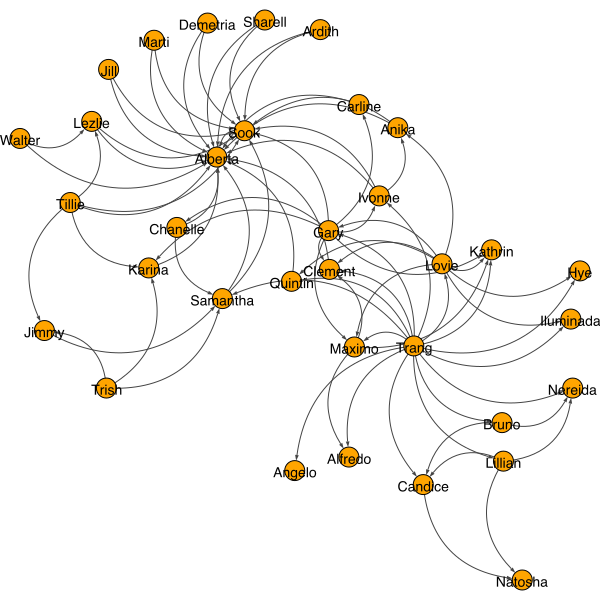

In [15]:
layout = graph.layout("kamada_kawai")
plot(graph, layout = layout, edge_curved=True, edge_arrow_size=.4, vertex_label=graph.vs['first_name'], vertex_color='orange')

 Let’s say we want to colour our network nodes based on gender as well as size them based on age. We will also change the width of the edges based on their weight. We need to apply a series of changes to the attributes pf our igraph. To get the different colors for different genders we need to add these colors to our dataframe karate_nodes.

In [16]:
karate_nodes['color'] = np.where(karate_nodes['gender']== 'F', 'red', 'blue')
karate_nodes['age'] = pd.to_numeric(karate_nodes['age'])

In [17]:
karate_nodes.head()

,id,first_name,last_name,gender,age,color
0,1,Trang,Philips,F,18,red
1,2,Lovie,Stanek,F,36,red
2,3,Gary,James,M,43,blue
3,4,Maximo,Larimer,M,41,blue
4,5,Bruno,Drury,M,18,blue


And then recreate the graph and check the vseq again whether color is now also an attribute

In [18]:
graph = Graph.DictList(
          vertices=karate_nodes.to_dict('records'),
          edges=karate_edges.to_dict('records'),
          directed=True,
          vertex_name_attr='id',
          edge_foreign_keys=('from', 'to'));

We then plot the graph using the graph.vs of the colors the same as we did with the ids

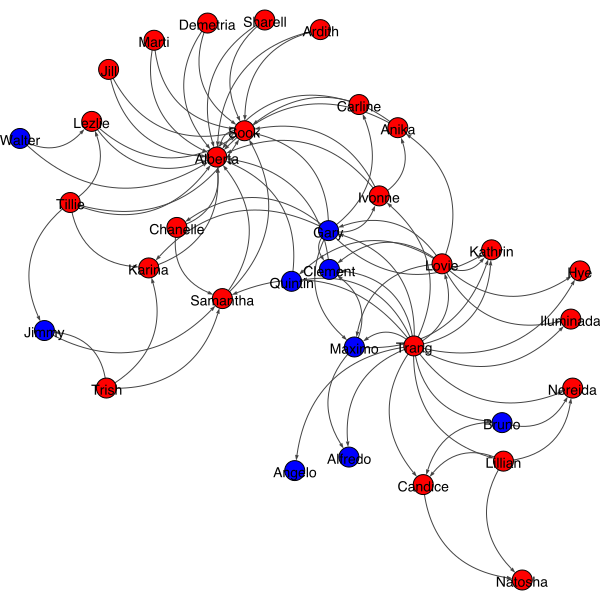

In [19]:
layout = graph.layout("kamada_kawai")
plot(graph, layout = layout, edge_curved=True, edge_arrow_size=.4, vertex_label=graph.vs['first_name'], vertex_color=graph.vs['color'])

We also wanted to change the node size based on age. We could, for example, multiply the age by 0.4 to get the size that we want. We can do this more easily by setting vertex_size= [v*0.4 for v in graph.vs['age']].

*Could we have done the same for color?

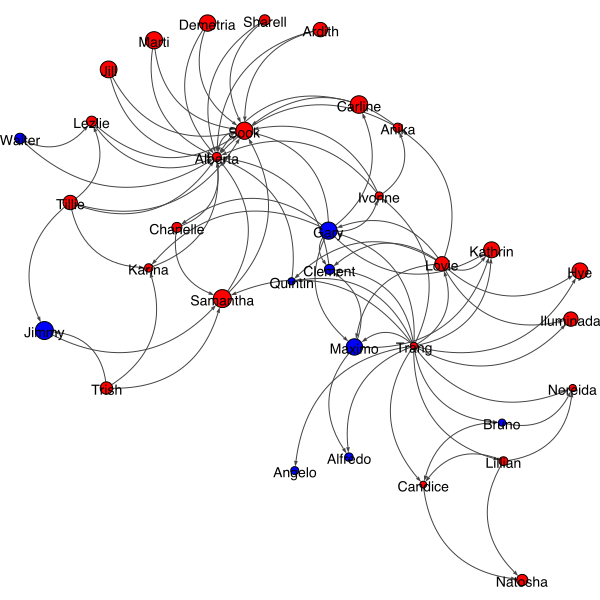

In [20]:
plot(graph, layout = layout, edge_curved=True, edge_arrow_size=.4, vertex_label=graph.vs['first_name'], vertex_color=graph.vs['color'], vertex_size= [v*0.4 for v in graph.vs['age']])


The weight of the like-relationship will determine the width of the arrow between two nodes. But check, this is an edge attribute instead of a vertix attribute, we can access this by using graph.es['weight'], now let's do the same as above but then for the edge.

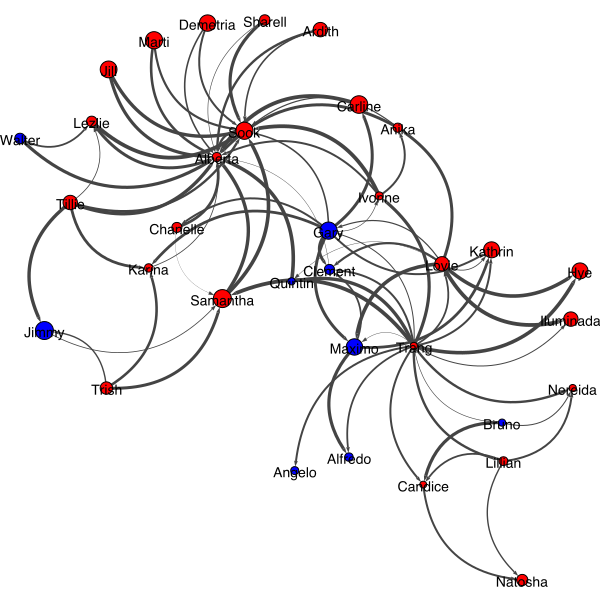

In [21]:
plot(graph, layout = layout, edge_curved=True, edge_arrow_size=.4, vertex_label=graph.vs['first_name'], vertex_color=graph.vs['color'], vertex_size= [v*0.4 for v in graph.vs['age']], edge_width = [e/5 for e in graph.es['weight']])

You can also plot graphs with different layouts.
To adjust the graph layout, igraph contains layout generators, which try to place the vertices and edges in a way that is more visually appealing. There are many layout functions, let's first try a random one.

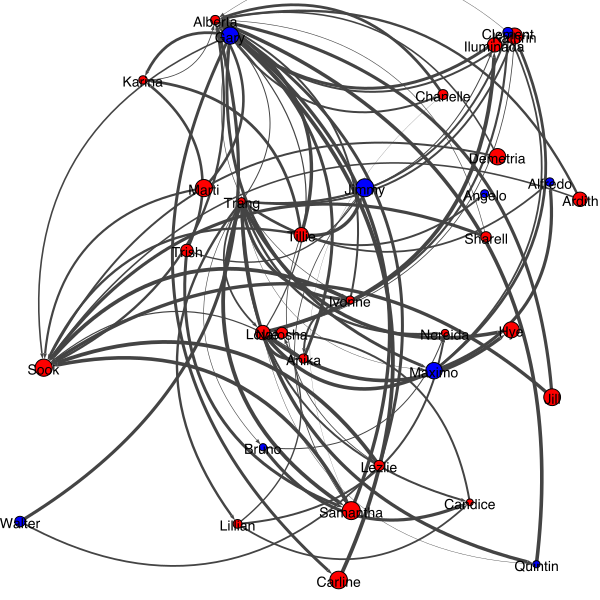

In [22]:
layout = graph.layout("random")
plot(graph, layout = layout, edge_curved=True, edge_arrow_size=.4, vertex_label=graph.vs['first_name'], vertex_color=graph.vs['color'], vertex_size= [v*0.4 for v in graph.vs['age']], edge_width = [e/5 for e in graph.es['weight']])

Maybe this one is a bit too curved in the edges which makes it unreadable, let's get rid of that argument

(Not sure, maybe the curved edges are better, what do you think?)

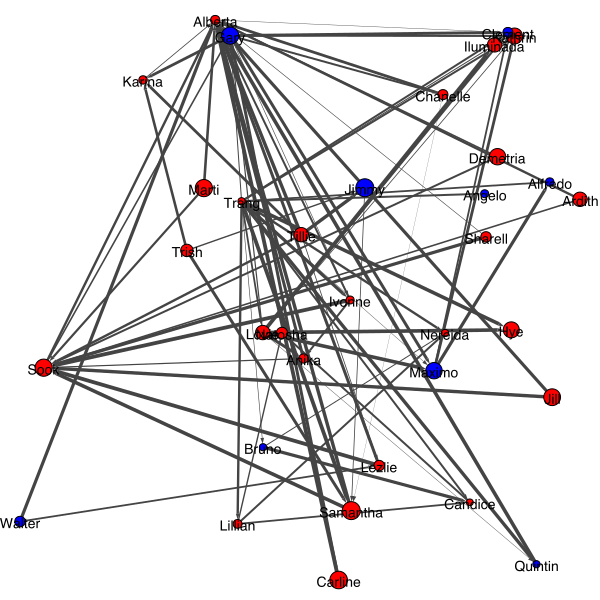

In [23]:
plot(graph, layout = layout, edge_arrow_size=.4, vertex_label=graph.vs['first_name'], vertex_color=graph.vs['color'], vertex_size= [v*0.4 for v in graph.vs['age']], edge_width = [e/5 for e in graph.es['weight']])

We can now change the layout parameter and use another function. Fruchterman Reingold (https://en.wikipedia.org/wiki/Force-directed_graph_drawing) is a very popular layout algorithm. Type in graph.layout("fr")

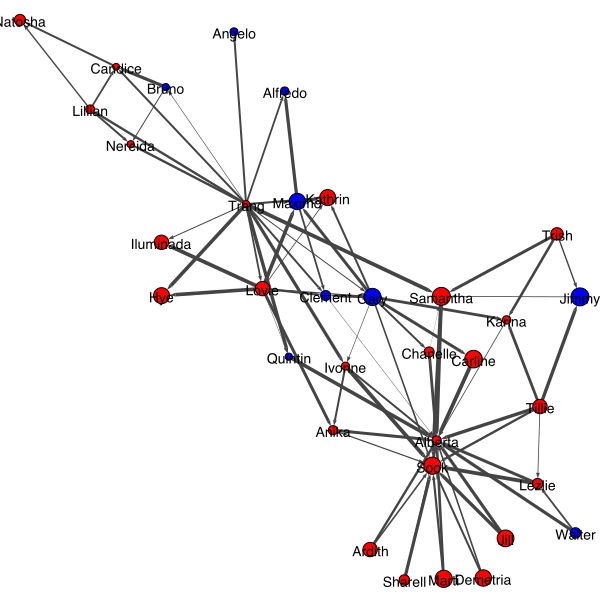

In [24]:
layout = graph.layout("fr")
plot(graph, layout = layout, edge_arrow_size=.4, vertex_label=graph.vs['first_name'], vertex_color=graph.vs['color'], vertex_size= [v*0.4 for v in graph.vs['age']], edge_width = [e/5 for e in graph.es['weight']])


This is much much better. But remember the original insight from the 1970s paper of the karate club? It described how the larger community of the whole club was effectively the result of several separate communities of members and split thererfore according to trust placed in either the administrator or instructor. Thus the whole karate club community can split up easily. Graph analysis comes with a lot of so-called community detection algorithms that support such investigations

(Possible tutorial: https://towardsdatascience.com/detecting-communities-in-a-language-co-occurrence-network-f6d9dfc70bab?)

In [25]:
com = graph.community_walktrap()
clp = com.as_clustering()

Now let's see what's behind clp

In [26]:
print(clp)

Clustering with 34 elements and 5 clusters
[0] 0, 1, 3, 7, 11, 12, 17, 19, 21
[1] 2, 8, 9, 13, 28, 30, 31
[2] 4, 5, 6, 10, 16
[3] 14, 15, 18, 20, 22, 26, 29, 32, 33
[4] 23, 24, 25, 27


The result is a list with similar information to the one we have already met during the clustering exercises. We can easily plot the communities with plot(clp, mark_groups=True).

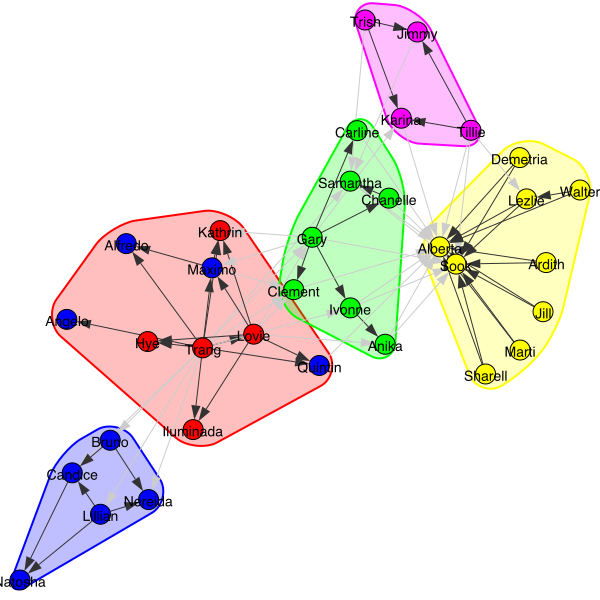

In [27]:
plot(clp, mark_groups=True, vertex_label=graph.vs['first_name'])

This graph already indicates that some members hold the whole network together by being the main link between the various 4 communities walktrap has detected. Let’s investigate this further and visualise the degree by which members are connected to other members. A graph degree basically counts the number of connections a member has to other members. Let’s overwrite the size of each nodes with the degree. First though we need to calculate the degree for each node. That’s very easy using igraph’s degree function. Simply type graph.degree()

In [28]:
graph.degree()

[16,
 9,
 10,
 6,
 3,
 4,
 4,
 4,
 5,
 2,
 3,
 1,
 2,
 5,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 5,
 3,
 3,
 2,
 4,
 3,
 4,
 4,
 6,
 12,
 17]

Now, let’s reassign the size of the nodes with setting vertex_size= vertex_size=graph.degree()

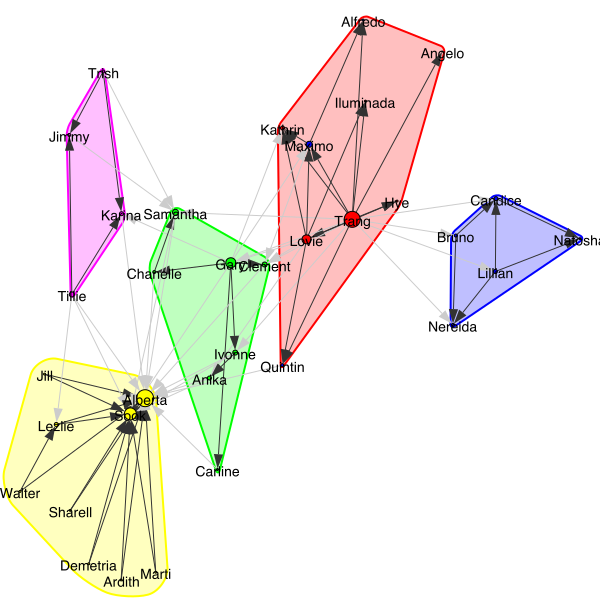

In [29]:
plot(clp, mark_groups=True, vertex_label=graph.vs['first_name'], vertex_size=graph.degree())

The new graph clearly shows now where the potential breaking points in the network are. Social network analysis is a very powerful tool with a large community already out there. Check it out and happy playing!

Let’s check what we have learned now.

What is a social network?

1. A movie
2. All my friends
3. Something other people know more about than me
4. A social structure made up of a set of social actors and their interactions

A social structure made up of a set of social actors and their interactions

Double the edge width of the graph (without the communities) based on the value we have set earleier based on weight.

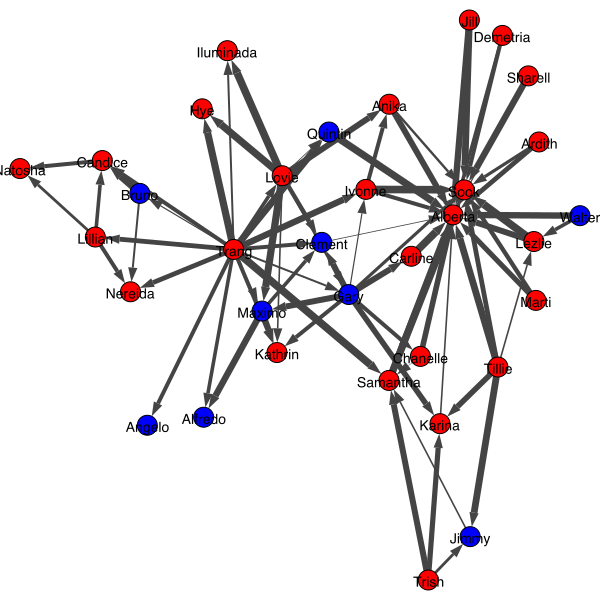

In [30]:
plot(graph, vertex_label=graph.vs['first_name'], edge_width = [e/2.5 for e in graph.es['weight']])

Change the size of the nodes

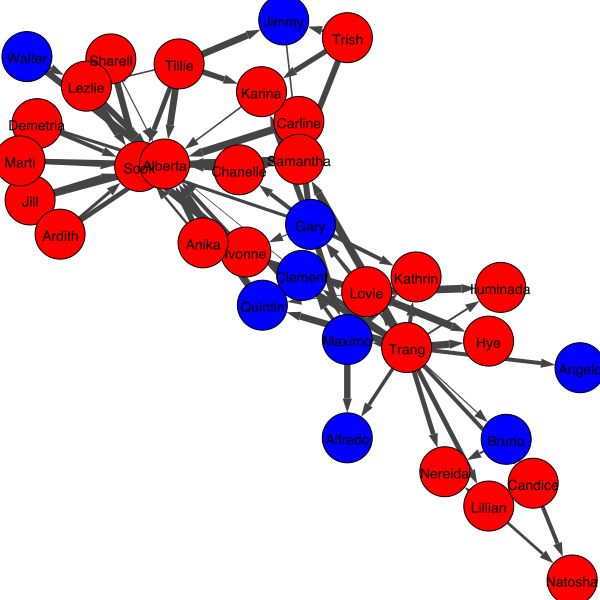

In [31]:

plot(graph, vertex_label=graph.vs['first_name'], edge_width = [e/2.5 for e in graph.es['weight']],vertex_size= 50)

Run another community detection algorithm graph.community_label_propagation()

In [32]:
prop= graph.community_label_propagation()

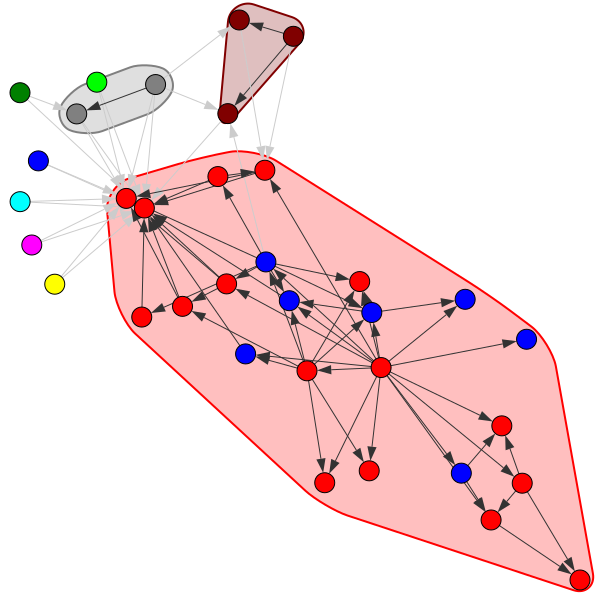

In [33]:
plot(prop, mark_groups=True)

That’s it for today. You have learned a lot of things about how to create social sensing networks. This is one of the most important social analytics techniques, and you can impress friends and family now with pretty graphs using the structure of social networks. Next time, we will look into content analysis using text mining.